In [22]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

# Implementing CNN with Chroma_Cens

In [23]:
filename='E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav'
ipd.Audio(filename)

In [24]:
def extract_Chroma_cens(filename):
    audio,sample_rate=librosa.load(filename, res_type='kaiser_fast')
    chroma_cens=np.mean(librosa.feature.chroma_cens(y=audio, sr=sample_rate, n_chroma=100).T,axis=0)
    return chroma_cens

In [25]:
filename='E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav'
a=extract_Chroma_cens(filename)
print(a.shape)
print(a)

(100,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.45331243 0.76288438 0.25132403 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [26]:
metadata=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [28]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'E:/Thesis/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            a= extract_Chroma_cens(fn)
            features=np.reshape((a),(20,5))
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


E:/Thesis/Dataset/UrbanSound8K/audio/fold1/.DS_Store


C:\Users\User\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


E:/Thesis/Dataset/UrbanSound8K/audio/fold2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold3/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold4/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold5/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold6/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold7/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold8/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold9/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 36.0 minutes 20.7 seconds
None
Finished feature extraction from all folder


In [29]:
cols=['Chroma_cens_feature', 'Matrix_shape','Label', 'Fold']
Chroma_features=pd.DataFrame(data=stacked_features, columns=cols)
Chroma_features.head()

,Chroma_cens_feature,Matrix_shape,Label,Fold
0,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","(20, 5)",dog_bark,1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","(20, 5)",dog_bark,1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","(20, 5)",dog_bark,1
3,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","(20, 5)",dog_bark,1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","(20, 5)",gun_shot,1


In [30]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Chroma_features.Chroma_cens_feature.tolist())
y = np.array(Chroma_features.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [31]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)

(6985, 20, 5) (1747, 20, 5) (6985, 10) (1747, 10) (8732, 10)


In [33]:
x_train =x_train.reshape(x_train.shape[0], 20, 5, 1)
x_test=x_test.reshape(x_test.shape[0], 20, 5, 1)

print(x_train.shape, x_test.shape)

(6985, 20, 5, 1) (1747, 20, 5, 1)


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [35]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [36]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [37]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

1747/1747 [==============================] - 1s 548us/step
Pre-training accuracy: 10.1889%


In [38]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Train on 6985 samples, validate on 1747 samples
Epoch 1/30
6985/6985 [==============================] - 10s 1ms/step - loss: 2.1973 - accuracy: 0.1625 - val_loss: 2.0988 - val_accuracy: 0.2072
Epoch 2/30
6985/6985 [==============================] - 9s 1ms/step - loss: 2.0601 - accuracy: 0.2178 - val_loss: 1.9975 - val_accuracy: 0.2570
Epoch 3/30
6985/6985 [==============================] - 9s 1ms/step - loss: 1.9865 - accuracy: 0.2558 - val_loss: 1.9378 - val_accuracy: 0.2799
Epoch 4/30
6985/6985 [==============================] - 9s 1ms/step - loss: 1.9485 - accuracy: 0.2660 - val_loss: 1.9207 - val_accuracy: 0.2891
Epoch 5/30
6985/6985 [==============================] - 9s 1ms/step - loss: 1.9173 - accuracy: 0.2756 - val_loss: 1.9139 - val_accuracy: 0.2902
Epoch 6/30
6985/6985 [==============================] - 9s 1ms/step - loss: 1.8915 - accuracy: 0.2890 - val_loss: 1.8978 - val_accuracy: 0.2885
Epoch 7/30
6985/6985 [==============================] - 9s 1ms/step - loss: 1.8717 - ac

In [39]:
score = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

6985/6985 [==============================] - 4s 552us/step
Training Accuracy:  0.44939154386520386
Testing Accuracy:  0.31368058919906616


In [40]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(1747,) (1747,)
                  precision    recall  f1-score   support

 Air_conditioner       0.69      0.27      0.39       195
        Car_horn       0.38      0.32      0.34        73
Children_playing       0.30      0.16      0.21       198
        Dog_Bark       0.38      0.23      0.29       190
        Drilling       0.42      0.11      0.18       222
   Engine_idling       0.56      0.38      0.45       197
        Gun_Shot       0.71      0.09      0.16        57
      Jackhammer       0.18      0.82      0.29       217
           Siren       0.67      0.24      0.35       204
    Street_Music       0.52      0.35      0.41       194

        accuracy                           0.31      1747
       macro avg       0.48      0.30      0.31      1747
    weighted avg       0.47      0.31      0.31      1747



In [41]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred)*100)

31.368059530623928


In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[ 52   1   0   4   1   6   0 122   1   8]
 [  0  23   3   5   1   9   0  31   0   1]
 [  0   2  32  14  10   2   0 119   7  12]
 [  2   3  22  44   3  12   0  87   4  13]
 [  6   9   7  11  25   8   0 143   3  10]
 [ 11  10   6   8   6  75   0  72   3   6]
 [  0   0   1   0   0   0   5  50   0   1]
 [  0   6   5   4   6  14   1 177   0   4]
 [  2   3  20  11   3   3   0 107  48   7]
 [  2   4   9  14   5   5   1  81   6  67]]


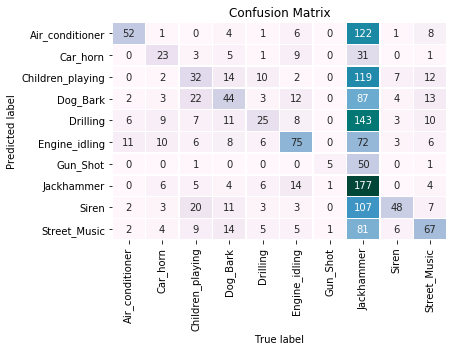

<Figure size 720x288 with 0 Axes>

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label');

In [45]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [46]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
7,Jackhammer,81.566820
5,Engine Idling,38.071066
9,Street Music,34.536082
1,Car Horn,31.506849
0,Air Conditioner,26.666667
8,Siren,23.529412
3,Dog bark,23.157895
2,Children Playing,16.161616
4,Drilling,11.261261
6,Gun Shot,8.771930


Text(0.5, 1.0, 'Accuracy per Class')

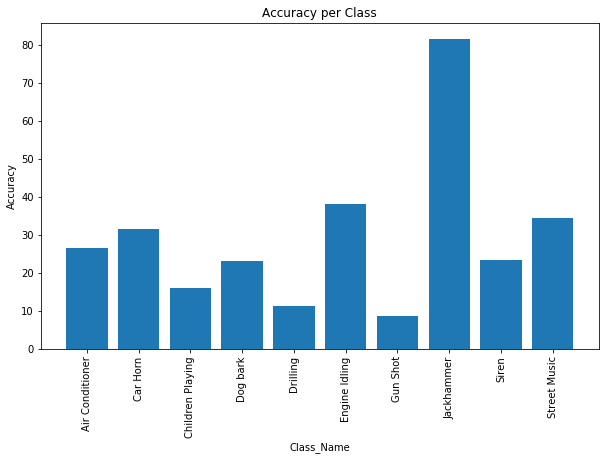

In [47]:
Y=np.around(accuracies , decimals=1)

index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y)
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')